In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.drop(columns=['id','Residence_type'],axis=1,inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df = df[df['gender'] != 'Other']

In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [10]:
df = df[df['age'] >= 1]

In [11]:
# Define a threshold for outlier detection
bmi_threshold = 50

# Filter out records with 'bmi' values beyond the threshold
df = df[df['bmi'] <= bmi_threshold]

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the median of the 'bmi' column in the training set
train_median_bmi = train_df['bmi'].median()

# Fill missing values in the training set
train_df['bmi'].fillna(train_median_bmi, inplace=True)

# Fill missing values in the test set using the median from the training set
test_df['bmi'].fillna(train_median_bmi, inplace=True)


In [13]:
train_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
779,Male,19.0,0,0,No,Private,106.70,24.0,never smoked,0
2851,Female,43.0,0,0,Yes,Private,88.23,37.6,Unknown,0
1571,Female,65.0,0,0,Yes,Self-employed,105.29,25.1,formerly smoked,0
4818,Female,44.0,0,0,Yes,Private,60.02,33.8,formerly smoked,0
1833,Male,14.0,0,0,No,children,92.86,20.7,formerly smoked,0
3143,Female,28.0,0,0,Yes,Private,71.97,27.2,never smoked,0
1544,Female,55.0,0,0,Yes,Private,87.78,25.2,formerly smoked,0
4335,Male,37.0,0,0,Yes,Private,232.29,40.8,smokes,0
232,Female,73.0,0,0,Yes,Self-employed,70.94,34.4,never smoked,1
970,Male,75.0,1,1,Yes,Self-employed,195.03,28.7,formerly smoked,0


In [14]:
train_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encode_cols = ['smoking_status', 'work_type']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for each column in training and test sets
for col in label_encode_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])
# Columns to one-hot encode
onehot_cols = ['gender','ever_married']

# Apply one-hot encoding to training set
train_df_onehot = pd.get_dummies(train_df, columns=onehot_cols)

# Apply one-hot encoding to test set
test_df_onehot = pd.get_dummies(test_df, columns=onehot_cols)

In [17]:
train_df_onehot.head(10)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes
779,19.0,0,0,2,106.70,24.0,2,0,0,1,1,0
2851,43.0,0,0,2,88.23,37.6,0,0,1,0,0,1
1571,65.0,0,0,3,105.29,25.1,1,0,1,0,0,1
4818,44.0,0,0,2,60.02,33.8,1,0,1,0,0,1
1833,14.0,0,0,4,92.86,20.7,1,0,0,1,1,0
3143,28.0,0,0,2,71.97,27.2,2,0,1,0,0,1
1544,55.0,0,0,2,87.78,25.2,1,0,1,0,0,1
4335,37.0,0,0,2,232.29,40.8,3,0,0,1,0,1
232,73.0,0,0,3,70.94,34.4,2,1,1,0,0,1
970,75.0,1,1,3,195.03,28.7,1,0,0,1,0,1


In [18]:
# Scaler -> min max scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
scale_cols = ['age', 'bmi','avg_glucose_level']

# Fit the scaler on the training data and transform both training and test data.
scaler.fit(train_df_onehot[scale_cols])

train_df_onehot[scale_cols] = scaler.transform(train_df_onehot[scale_cols])
test_df_onehot[scale_cols] = scaler.transform(test_df_onehot[scale_cols])


In [19]:
X_train = train_df_onehot.drop('stroke',axis=1)
y_train = train_df_onehot['stroke']

X_test = test_df_onehot.drop('stroke',axis=1)
y_test = test_df_onehot['stroke']

In [20]:
# Build model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

logistic_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

GaussianNB()


 Logistic Regression Accuracy: 0.9426 



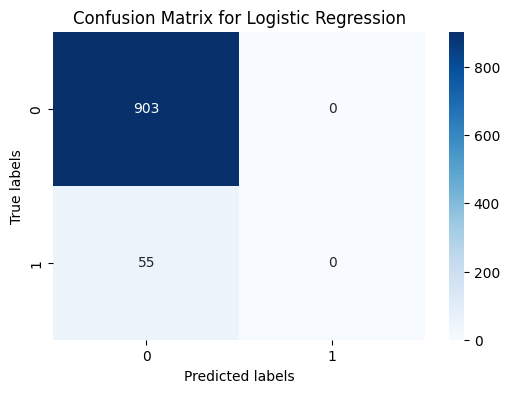


 SVM Accuracy: 0.9426 



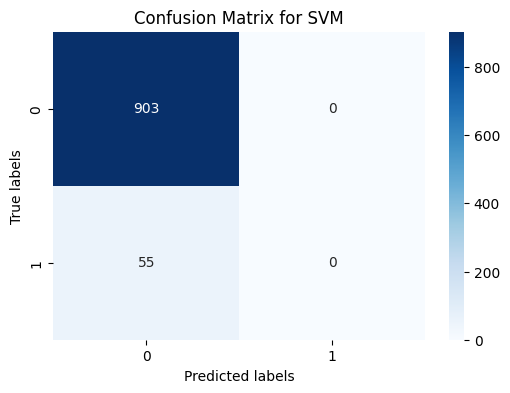


 Decision Tree Accuracy: 0.9123 



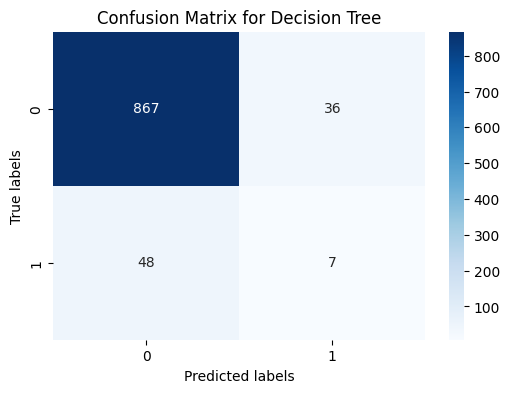


 KNN Accuracy: 0.9384 



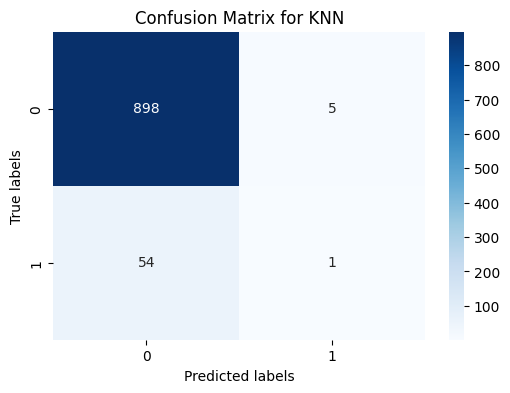


 Naive Bayes Accuracy: 0.8507 



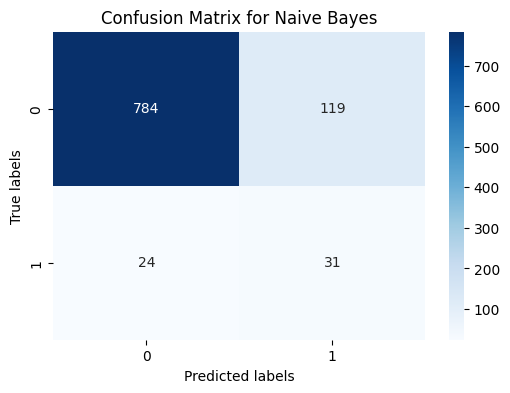

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    'Logistic Regression': logistic_model,
    'SVM': svc_model,
    'Decision Tree': decision_tree_model,
    'KNN': knn_model,
    'Naive Bayes': naive_bayes_model
}

# Calculate accuracy scores and confusion matrices for each model
for name, model in models.items():
    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n {name} Accuracy: {accuracy:.4f} \n")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters grid
param_grid = {'C': [0.1, 1, 10, 100],
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create the SVC model
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_


'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n\n# Define the hyperparameters grid\nparam_grid = {\'C\': [0.1, 1, 10, 100],\n              \'degree\': [2, 3, 4],\n              \'gamma\': [\'scale\', \'auto\'],\n              \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\']}\n\n# Create the SVC model\nsvc = SVC()\n\n# Create GridSearchCV object\ngrid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring=\'accuracy\')\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nprint(f"Best hyperparameters: {best_params}")\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n'

In [23]:
svc_model = SVC(C= 0.1, degree=2,gamma='scale', kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=0.1, degree=2, kernel='linear')

In [24]:
print(svc_model.score(X_test,y_test))

0.94258872651357


In [25]:
# imbalanced classes in dataset -> so apply under_sampling and over_sampling

In [26]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [29]:
print(pd.Series(y_train_resampled).value_counts())


1    3370
0    3026
Name: stroke, dtype: int64


In [30]:
for column in X_train_resampled.columns:
    print(f"Value counts for {column}:")
    print(X_train_resampled[column].value_counts())
    print('---' * 10)

Value counts for age:
0.950617    93
0.962963    82
0.543210    61
0.370370    60
0.271605    56
            ..
0.768429     1
0.747035     1
0.807166     1
0.814219     1
0.785591     1
Name: age, Length: 3164, dtype: int64
------------------------------
Value counts for hypertension:
0    5649
1     747
Name: hypertension, dtype: int64
------------------------------
Value counts for heart_disease:
0    6026
1     370
Name: heart_disease, dtype: int64
------------------------------
Value counts for work_type:
2    3963
3    1071
0     839
4     509
1      14
Name: work_type, dtype: int64
------------------------------
Value counts for avg_glucose_level:
0.171934    5
0.213600    4
0.081687    4
0.177295    4
0.108728    4
           ..
0.195918    1
0.112914    1
0.908202    1
0.161070    1
0.204408    1
Name: avg_glucose_level, Length: 5906, dtype: int64
------------------------------
Value counts for bmi:
0.429293    33
0.330808    29
0.505051    28
0.345960    25
0.373737    25
   

In [31]:
svc_model.fit(X_train_resampled, y_train_resampled)
accuracy = svc_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7004175365344467


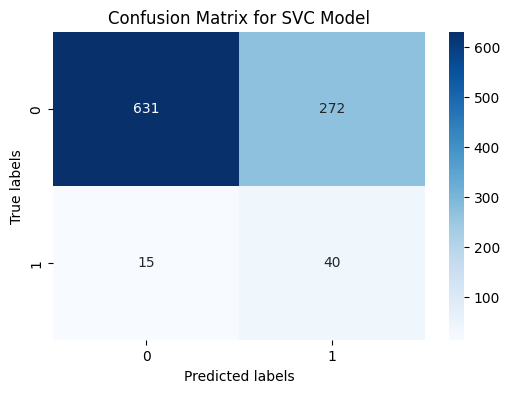

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = svc_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Model')
plt.show()


In [33]:
from sklearn.model_selection import KFold, cross_val_score


class_weights = {0: 3, 1: 1.5}
# Create a logistic regression model
model = SVC(C= 0.1, degree=2,gamma='scale', kernel='linear',class_weight=class_weights)
# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create the k-fold cross-validation object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the mean accuracy
mean_accuracy = cross_val_score(model,X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy').mean()

# Train the model on the entire training dataset
model.fit(X_train_resampled, y_train_resampled)

# Test the trained model on the test dataset
test_accuracy = model.score(X_test, y_test)

print("Mean accuracy from k-fold cross-validation:", mean_accuracy)
print("Test accuracy after training on the entire training set:", test_accuracy)


Mean accuracy from k-fold cross-validation: 0.8386500684128224
Test accuracy after training on the entire training set: 0.7807933194154488


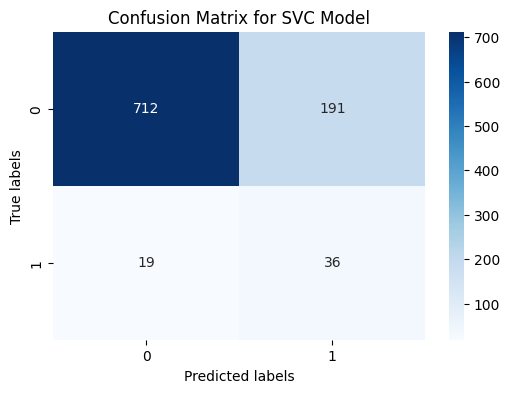

In [34]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Model')
plt.show()


In [35]:
# if I prioritize sensitivity ( true positive rate )
# ->the model was better befor manualy gives weights for classes

In [36]:
# Fill missing values in 'bmi' with median
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

# Label encoding for 'smoking_status' and 'work_type'
label_encoder = LabelEncoder()
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])

# One-hot encoding for 'gender' and 'ever_married'
df = pd.get_dummies(df, columns=['gender', 'ever_married'])

# Scaling 'bmi', 'age', and 'avg_glucose_level' with MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['bmi', 'age', 'avg_glucose_level']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# 2. Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# 3. Model Training
svc_model =SVC(C= 0.1, degree=2,gamma='scale', kernel='linear')
svc_model.fit(X_train_resampled, y_train_resampled)

# 4. Model Evaluation
# You can evaluate the model performance on the test data if required
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test data
y_pred = svc_model.predict(X_test)

# Calculate accuracy
accuracy = svc_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7004175365344467
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.81       903
           1       0.13      0.73      0.22        55

    accuracy                           0.70       958
   macro avg       0.55      0.71      0.52       958
weighted avg       0.93      0.70      0.78       958

Confusion Matrix:
[[631 272]
 [ 15  40]]


In [37]:
df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes
0,0.814815,0,1,2,0.801265,0.664141,1,1,0,1,0,1
2,0.975309,0,1,2,0.234512,0.560606,2,1,0,1,0,1
3,0.592593,0,0,2,0.536008,0.608586,3,1,1,0,0,1
4,0.962963,1,0,3,0.549349,0.345960,2,1,1,0,0,1
5,0.987654,0,0,2,0.605161,0.472222,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.148148,0,0,4,0.221402,0.209596,0,0,1,0,1,0
5106,0.987654,0,0,3,0.323516,0.750000,2,0,1,0,0,1
5107,0.419753,0,0,3,0.128658,0.512626,2,0,1,0,0,1
5108,0.617284,0,0,2,0.513203,0.386364,1,0,0,1,0,1


In [38]:
# drop id and Residence_type and
# drop records where gender == Other
# drop records where age <1
# drop outliers for bmi feature
# fill missing values by median for bmi
# encoding : smoking_status , work_type -> label encoding
# gender, ever_married -> onhot encoding
# scaling : age, bmi, avg_glucose_level -> min max scaler
# both of over, under sampling usig imblearn
# cross validation (K_fold)
# apply SVC model

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Load your data (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Preprocessing Steps

# 1. Drop unwanted columns and filter records
data = data.drop(columns=['id', 'Residence_type'])
data = data[data['gender'].isin(['Male', 'Female'])]  # Filter valid genders
data = data[data['age'] >= 1]  # Filter valid age

# 2. Handle missing values (using median for 'bmi')
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# 3. Encoding categorical features

# One-Hot Encoding for 'gender' and 'ever_married'
gender_encoder = OneHotEncoder(sparse=False)  # Avoid sparse matrix
ever_married_encoder = OneHotEncoder(sparse=False)

# Label Encoding for 'smoking_status' and 'work_type'
smoking_encoder = LabelEncoder()
work_encoder = LabelEncoder()

# Combine encoders for transformation
categorical_transformer = ColumnTransformer(
    transformers=[
        ('gender_ohe', gender_encoder, ['gender']),
        ('ever_married_ohe', ever_married_encoder, ['ever_married']),
        ('smoking_le', smoking_encoder, ['smoking_status']),
        ('work_le', work_encoder, ['work_type']),
    ]
)

# 4. Feature scaling
numeric_transformer = SimpleImputer(strategy='median')  # Handle potential scaling issues

scaler = MinMaxScaler()

# Combine transformers for features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_transformer', categorical_transformer, ['gender', 'ever_married', 'smoking_status', 'work_type']),
        ('num_transformer', numeric_transformer, ['age', 'bmi', 'avg_glucose_level']),
    ]
)

# 5. Oversampling/Undersampling for imbalanced classes
oversampler = SMOTE()  # Explore both SMOTE and RandomOverSampler
undersampler = NearMiss()  # Explore both NearMiss and RandomUnderSampler

# 6. K-Fold Cross-validation for robust model evaluation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified for class imbalance

# 7. SVC Model (explore other classifiers if needed)
svc_model = SVC()

# Machine Learning Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', oversampler),  # Experiment with over/undersampling separately and together
    ('classifier', svc_model),
])

# Train-Test Split
X = data.drop('stroke', axis=1)  # Features
y = data['stroke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cross-validation loop
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the pipeline
    pipeline.fit(X_train_fold, y_train_fold)

    # Evaluate the model (e.g., accuracy, F1 score, etc.)
    predictions = pipeline.predict(X_test_fold)
    # Implement your desired evaluation metrics here

# Evaluate the pipeline on the hold-out test set for final performance estimation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)  # Corrected line: predict on the hold-out test set

# Now you can use y_pred and y_test to calculate evaluation metrics
# (e.g., accuracy, precision, recall, F1 score, confusion matrix)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_matrix}")

In [ ]:
test = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
if 'stroke' in df.columns:
    test.drop(columns='stroke', axis=1, inplace=True)

y_pred_test = pipeline.predict(test)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(pipeline, 'trained_pipeline.pkl')


In [ ]:
# Load the model from the file
loaded_pipeline = joblib.load('trained_pipeline.pkl')

if 'stroke' in test.columns:
    test.drop(columns='stroke', axis=1, inplace=True)
# You can now use the loaded pipeline to make predictions
y_pred_test_loaded = loaded_pipeline.predict(test)
